# Codigo Tesis

A continuación se muestra el codigo con el cual se propone el modelo del trabajo de grado

# Importar librerias

In [ ]:
!pip install -U kaleido
!pip install lmfit
!pip install sdeint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 10.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sdeint: filename=sdeint-0.3.0-py3-none-any.whl size=25906 sha256=b7c0e3f917793a7b4c7d6bc9dc901a592c5b8a5bca5b58547a01e3ab45cda38a
  Stored in directory: /root/.cache/pip/wheels/1f/a7/39/a63d76610998f2f995bd0459099ca69e5509723fd2e06642da
Successfully built sdeint


In [ ]:
import os
import sys
from scipy.integrate import odeint
import sdeint
import plotly.graph_objects as go
import plotly.io as pio
import requests
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from scipy.signal import savgol_filter
rcParams['figure.figsize'] = 15, 6
pio.renderers.default = "notebook"
%matplotlib inline
plt.style.use('ggplot')
## Datos de covid https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data  ##

# Importar Base de datos en formato Excel

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("gdrive/MyDrive/Colab Notebooks/DatosNariño.csv")
data

<ipython-input-4-afa5c8657567>:1: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2021-01-15 00:00:00,"1,851,419",2021-01-12 00:00:00,52,NARIÑO,"52,227",CUMBAL,24,1,M,...,NaN,NaN,Recuperado,2021-01-08 00:00:00,NaN,2021-01-14 00:00:00,2021-01-26 00:00:00,Tiempo,1.0,PASTO
1,2021-01-15 00:00:00,"1,851,420",2021-01-11 00:00:00,52,NARIÑO,"52,227",CUMBAL,24,1,M,...,NaN,NaN,Recuperado,2021-01-08 00:00:00,NaN,2021-01-13 00:00:00,2021-01-26 00:00:00,Tiempo,1.0,Por definir
2,2021-01-15 00:00:00,"1,851,421",2021-01-12 00:00:00,52,NARIÑO,"52,317",GUACHUCAL,33,1,M,...,NaN,NaN,Recuperado,2021-01-08 00:00:00,NaN,2021-01-13 00:00:00,2021-01-26 00:00:00,Tiempo,1.0,Por definir
3,2021-01-15 00:00:00,"1,851,422",2021-01-12 00:00:00,52,NARIÑO,"52,378",LA CRUZ,35,1,F,...,NaN,NaN,Recuperado,2021-01-08 00:00:00,NaN,2021-01-12 00:00:00,2021-01-26 00:00:00,Tiempo,6.0,NaN
4,2021-01-15 00:00:00,"1,851,423",2021-01-13 00:00:00,52,NARIÑO,"52,378",LA CRUZ,36,1,F,...,NaN,NaN,Recuperado,2021-01-08 00:00:00,NaN,2021-01-13 00:00:00,2021-01-26 00:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104323,2022-02-05 00:00:00,"5,946,504",2022-02-01 00:00:00,52,NARIÑO,"52,356",IPIALES,80,1,M,...,NaN,NaN,Recuperado,2022-01-24 00:00:00,NaN,2022-02-01 00:00:00,2022-02-06 00:00:00,PCR,6.0,NaN
104324,2022-02-05 00:00:00,"5,946,519",2022-01-24 00:00:00,52,NARIÑO,"52,001",PASTO,48,1,F,...,NaN,NaN,Recuperado,2022-01-24 00:00:00,NaN,2022-01-24 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
104325,2022-02-05 00:00:00,"5,946,549",2022-02-02 00:00:00,52,NARIÑO,"52,678",SAMANIEGO,74,1,F,...,NaN,NaN,Recuperado,2022-01-22 00:00:00,NaN,2022-02-03 00:00:00,2022-02-06 00:00:00,Tiempo,6.0,NaN
104326,2022-02-05 00:00:00,"5,946,629",2022-02-03 00:00:00,52,NARIÑO,"52,001",PASTO,59,1,F,...,NaN,NaN,Recuperado,2022-01-30 00:00:00,NaN,2022-02-03 00:00:00,2022-02-09 00:00:00,Tiempo,6.0,NaN


Sacar los datos "NAN" de la fecha de diagnostico

In [ ]:
data=data.dropna(subset=["Fecha de diagnóstico"])

In [ ]:
#diffrec.describe()

In [ ]:
data['Fecha de diagnóstico']=pd.to_datetime(data['Fecha de diagnóstico'])
data['Fecha de recuperación']=pd.to_datetime(data['Fecha de recuperación'])
data['Fecha de inicio de síntomas']=pd.to_datetime(data['Fecha de inicio de síntomas'])
#diff_month(data['Fecha de diagnóstico'], data['Fecha de recuperación'])
data_recuperados=data.dropna(subset=['Fecha de recuperación'])
data_recuperados=data.dropna(subset=['Fecha de inicio de síntomas'])
diffrec=(data_recuperados['Fecha de recuperación']-data_recuperados['Fecha de inicio de síntomas']).dt.days
diffrec.describe()
Listavalores=diffrec[(diffrec[:]>=14) & (diffrec[:]<=22)]
Listavalores.mean()

<ipython-input-7-677ec1a8dc9c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-677ec1a8dc9c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-677ec1a8dc9c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16.626906332630004

In [ ]:
data_muertos=data.dropna(subset=['Fecha de muerte'])
data_muertos=data_muertos.dropna(subset=['Fecha de inicio de síntomas'])
data_muertos['Fecha de muerte']=pd.to_datetime(data_muertos['Fecha de muerte'])
data_muertos['Fecha de inicio de síntomas']=pd.to_datetime(data_muertos['Fecha de inicio de síntomas'])
data_muertos['Fecha de inicio de síntomas']=data_muertos['Fecha de inicio de síntomas'].dt.date
data_muertos['Fecha de inicio de síntomas']=pd.to_datetime(data_muertos['Fecha de inicio de síntomas'])
diffrec2=(data_muertos['Fecha de muerte']-data_muertos['Fecha de inicio de síntomas']).dt.days
diffrec2.describe()
Listavalores2=diffrec2[(diffrec2[:]>=12) & (diffrec2[:]<=30)]
Listavalores2.mean()

20.180220883534137

# Datos infectados por dia

<ipython-input-9-cae77bfe1577>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



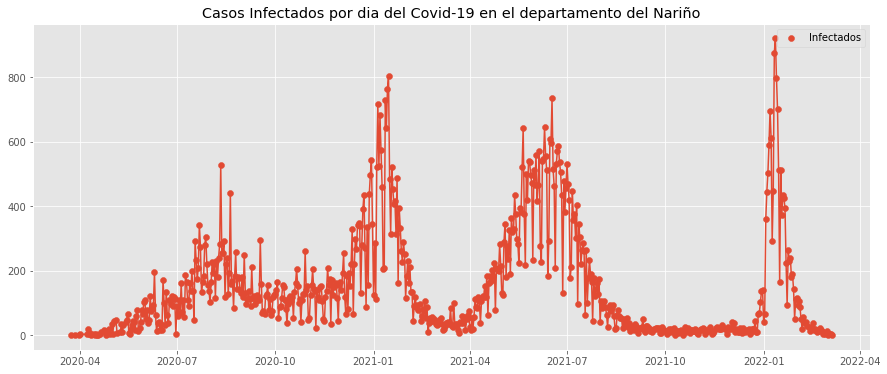

,Infectados
2020-03-24,1
2020-03-28,1
2020-03-31,2
2020-04-01,3
2020-04-08,3
...,...
2022-03-02,1
2022-03-03,5
2022-03-04,5
2022-03-05,3


In [ ]:

data['Fecha de diagnóstico']=pd.to_datetime(data['Fecha de diagnóstico'])
#convert to time series:
Infectados=data["Fecha de diagnóstico"].value_counts()
Infectados=Infectados.sort_index()
Infectados.index = pd.to_datetime(Infectados.index)
Infectados=Infectados.to_frame(name="Infectados")

####Graficar la Serie#####
rcParams['figure.figsize'] = 15, 6
plt.plot(Infectados)
plt.title('Casos Infectados por dia del Covid-19 en el departamento del Nariño')
plt.scatter(Infectados.index,Infectados, label="Infectados")
plt.savefig("gdrive/MyDrive/ImagenesTesis/Infectadosdia.jpg")
plt.legend(loc='best')
plt.show()
Infectados

# Datos Recuperados por dia

<ipython-input-10-eb00c48a61f2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



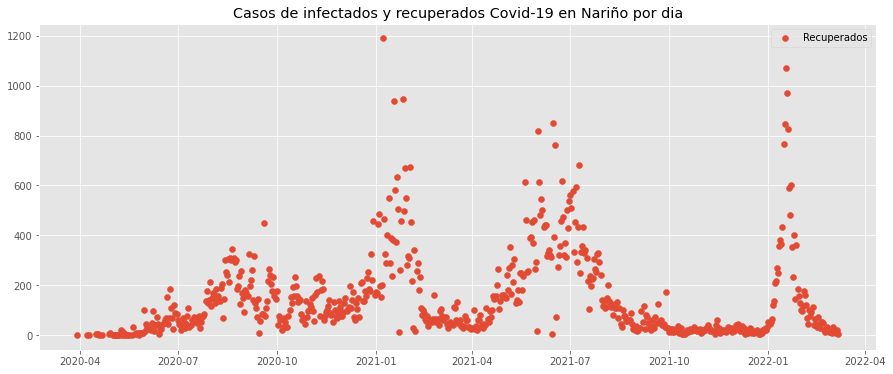

In [ ]:
Recuperados=data[data["Recuperado"]=="Recuperado"]
Recuperados['Fecha de recuperación']=pd.to_datetime(Recuperados['Fecha de recuperación'])
Recuperados=Recuperados["Fecha de recuperación"].value_counts()
Recuperados=Recuperados.sort_index()
Recuperados.index = pd.to_datetime(Recuperados.index)
Recuperados=Recuperados.to_frame(name="Recuperados")


####Graficar la Serie#####
rcParams['figure.figsize'] = 15, 6
plt.scatter(Recuperados.index,Recuperados, label="Recuperados")
#plt.scatter(Infectados.index, Infectados, label="Infectados")
plt.title('Casos de infectados y recuperados Covid-19 en Nariño por dia')
plt.legend(loc='best')
plt.show()

# Datos muertos por dia

<ipython-input-11-1859957b7040>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



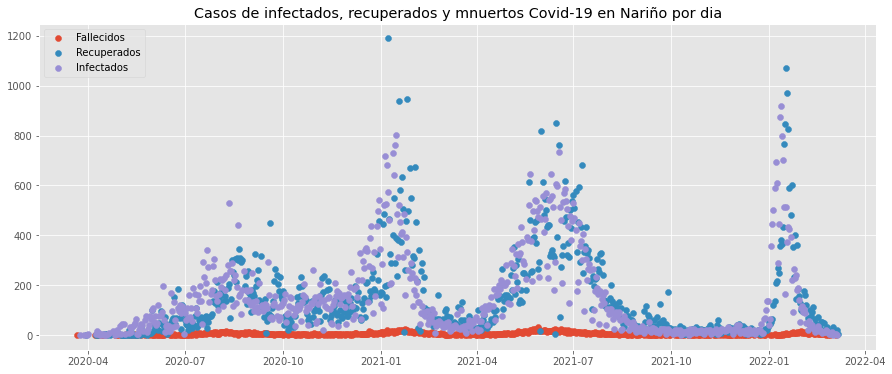

In [ ]:
Fallecidos=data[(data["Recuperado"]=="Fallecido")|(data["Recuperado"]=="fallecido")|(data['Recuperado'].isnull())]
Fallecidos['Fecha de muerte']=pd.to_datetime(Fallecidos['Fecha de muerte'])
Fallecidos=Fallecidos["Fecha de muerte"].value_counts()
Fallecidos=Fallecidos.sort_index()
Fallecidos.index = pd.to_datetime(Fallecidos.index)
Fallecidos=Fallecidos.to_frame(name="Fallecidos")
####Graficar la Serie#####
plt.scatter(Fallecidos.index,Fallecidos, label="Fallecidos")
plt.scatter(Recuperados.index,Recuperados, label="Recuperados")
plt.scatter(Infectados.index,Infectados, label="Infectados")
plt.title('Casos de infectados, recuperados y mnuertos Covid-19 en Nariño por dia')
plt.legend(loc='best')
plt.show()

In [ ]:
FTotal=Fallecidos.sum()
RTotal=Recuperados.sum()
FTotal[0]/(FTotal[0]+RTotal[0])

0.03634844570781035

In [ ]:
data["Recuperado"].value_counts()

Recuperado    100346
Fallecido       3289
Activo            69
fallecido          8
Name: Recuperado, dtype: int64

# Modelo de internet :


#### A supplementary blogpost to this notebook can be found at [Estimating Parameters of Compartmental Models from Observed Data](https://dilbertai.com/2020/04/27/estimating-parameters-of-compartmental-models-from-observed-data/)


# Datos codigo github - Modelo de internet :
https://github.com/silpara/simulators/blob/master/compartmental_models/SEIRD%20Simulator%20with%20Parameter%20Estimation%20in%20Python.ipynb

In [ ]:
# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons

style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

# Parameter estimation - Modelo de internet :

# Union de datos Modelo propuesto de tesis

## Datos infectados, recuperados y fallecidos

In [ ]:
Datos1=Infectados.join(Recuperados)
Datos=Datos1.join(Fallecidos)
Datos=Datos.fillna(0)
Datos

,Infectados,Recuperados,Fallecidos
2020-03-24,1,0.0,0.0
2020-03-28,1,0.0,0.0
2020-03-31,2,0.0,0.0
2020-04-01,3,0.0,0.0
2020-04-08,3,1.0,0.0
...,...,...,...
2022-03-02,1,31.0,5.0
2022-03-03,5,16.0,3.0
2022-03-04,5,16.0,0.0
2022-03-05,3,10.0,1.0


In [ ]:
s = pd.Series(pd.date_range("2020-3-24", periods=365*2-17, freq="D"))
td = pd.Series([pd.Timedelta(days=i) for i in range(365*2-17)])
df = pd.DataFrame({"A": s, "B": td})
df.index = pd.to_datetime(df["A"])
Datosfinal=df.join(Datos)
Datosfinal = Datosfinal.replace(np.nan, 0)
Datosfinal

,A,B,Infectados,Recuperados,Fallecidos
A,,,,,
2020-03-24,2020-03-24,0 days,1.0,0.0,0.0
2020-03-25,2020-03-25,1 days,0.0,0.0,0.0
2020-03-26,2020-03-26,2 days,0.0,0.0,0.0
2020-03-27,2020-03-27,3 days,0.0,0.0,0.0
2020-03-28,2020-03-28,4 days,1.0,0.0,0.0
...,...,...,...,...,...
2022-03-02,2022-03-02,708 days,1.0,31.0,5.0
2022-03-03,2022-03-03,709 days,5.0,16.0,3.0
2022-03-04,2022-03-04,710 days,5.0,16.0,0.0


In [ ]:
def Totales(NombreColumnaDataframe,NombreTotales):
    total=Datosfinal[NombreColumnaDataframe].values
    Lista=[]
    for i in range(len(total)):
        if i==0:
            save=total[i]
            Lista.append(save)
        else:
            save=total[i]+Lista[-1]
            Lista.append(save)
    Datosfinal[NombreTotales]=Lista

In [ ]:
Totales("Infectados","Total")
Totales("Recuperados","Total Recuperados")
Totales("Fallecidos","Total Fallecidos")

In [ ]:
Datosfinal['Real infected'] = Datosfinal['Total'] - Datosfinal['Total Recuperados'] - Datosfinal['Total Fallecidos']
Datosfinal['total_recovered_or_dead'] = Datosfinal['Total Recuperados'] + Datosfinal['Total Fallecidos']
Datosfinal

,A,B,Infectados,Recuperados,Fallecidos,Total,Total Recuperados,Total Fallecidos,Real infected,total_recovered_or_dead
A,,,,,,,,,,
2020-03-24,2020-03-24,0 days,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-03-25,2020-03-25,1 days,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-03-26,2020-03-26,2 days,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-03-27,2020-03-27,3 days,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-03-28,2020-03-28,4 days,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-03-02,2022-03-02,708 days,1.0,31.0,5.0,104185.0,100266.0,3771.0,148.0,104037.0
2022-03-03,2022-03-03,709 days,5.0,16.0,3.0,104190.0,100282.0,3774.0,134.0,104056.0
2022-03-04,2022-03-04,710 days,5.0,16.0,0.0,104195.0,100298.0,3774.0,123.0,104072.0


<AxesSubplot:xlabel='A'>

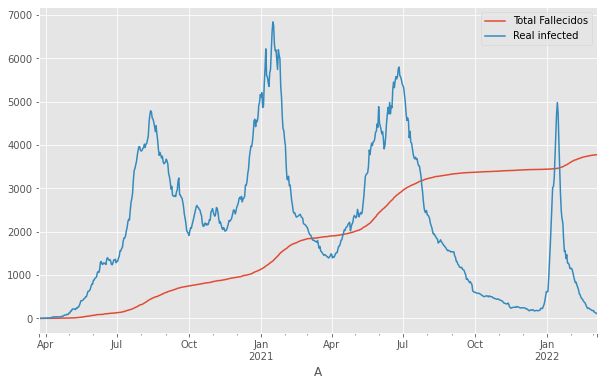

In [ ]:
rcParams['figure.figsize'] = 10, 6
Datosfinal.plot(x="A", y=["Total Fallecidos","Real infected"])

In [ ]:
Datosfinal.describe()

,B,Infectados,Recuperados,Fallecidos,Total,Total Recuperados,Total Fallecidos,Real infected,total_recovered_or_dead
count,713,713.000000,713.000000,713.00000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,356 days 00:00:00,146.143058,140.711080,5.29453,50577.984572,46567.552595,1865.366059,2145.065919,48432.918654
std,205 days 23:16:18.447710568,166.908007,170.234218,5.47237,35704.233339,34601.991622,1316.874392,1623.876191,35916.798483
min,0 days 00:00:00,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,178 days 00:00:00,22.000000,26.000000,1.00000,17464.000000,13526.000000,700.000000,609.000000,14226.000000
50%,356 days 00:00:00,91.000000,77.000000,4.00000,49836.000000,46265.000000,1862.000000,2019.000000,48127.000000
75%,534 days 00:00:00,194.000000,185.000000,8.00000,89009.000000,84410.000000,3346.000000,3217.000000,87756.000000
max,712 days 00:00:00,920.000000,1189.000000,32.00000,104200.000000,100327.000000,3775.000000,6843.000000,104102.000000


# Modelo propuesto

In [ ]:
def ode_model(z, t, beta, r):
    """
    Reference https://www.idmod.org/docs/hiv/model-seir.html
    """
    S, E, U, P, F, RU,RR,DU,DR = z
    N=S+E+U+P+F+RU+RR+DU+DR
    dSdt =  -beta*S/initN*(alphap*P+alphau*U+F)+Lambda-mu*S
    dEdt =  beta*S/initN*(alphap*P+alphau*U+F)-E/De - mu*E
    dUdt =  (1-r)*E/De-U/(beta1*Dr)-delta1*muc*U-mu*U
    dPdt =  r*(1-f)*E/De-P/Dr-muc*P-mu*P
    dFdt =  r*f*E/De-beta2*F/Dr-muc*F/delta2-mu*F
    dRUdt = U/(beta1*Dr)+beta2*F/Dr-mu*RU
    dRRdt = P/Dr-mu*RR
    dDUdt = delta1*muc*U+muc*F/delta2
    dDRdt = muc*P
    return [dSdt,dEdt, dUdt, dPdt, dFdt, dRUdt, dRRdt, dDUdt, dDRdt]

In [ ]:
def ode_solver(t, initial_conditions, params):
    initE, initU, initP, initF, initRU, intRR, intDU, intDR, initN   = initial_conditions
    beta, r = params['beta'].value, params['r'].value
    initS = initN - (initE+initU+initP+initF+initRU+intRR+intDU+intDR)
    res = odeint(ode_model, [initS,initE, initU, initP, initF, initRU, initRR, initDU, initDR], t, args=(beta, r))
    return res

In [ ]:
def error(params, initial_conditions, tspan, data):
    sol = ode_solver(tspan, initial_conditions, params)
    #return (sol[:, [3,6,8]] - data).ravel()
    return (sol[:, [3]] - data).ravel()

Seleccion de datos

In [ ]:
#data = Datosfinal.loc["2020-03-24  ":"2020-08-14   ", ['Real infected', 'Total Recuperados', 'Total Fallecidos']].values
data = Datosfinal.loc["2020-03-24   ":"2020-07-01   ", ['Real infected']].values
days = data.shape[0]
tspan = np.arange(0, days, 1)
tspan
#plt.plot(tspan, data[:, 0], label='Infectados')
#plt.plot(tspan, data[:, 1], label='Recuperados')
#plt.plot(tspan, data[:, 2], label='Muertos')
#plt.legend()
#plt.show()
Datosfinal.loc["2020-06-10   "]

A                          2020-06-10 00:00:00
B                             78 days 00:00:00
Infectados                               197.0
Recuperados                               39.0
Fallecidos                                 1.0
Total                                   2020.0
Total Recuperados                        635.0
Total Fallecidos                          91.0
Real infected                           1294.0
total_recovered_or_dead                  726.0
Name: 2020-06-10 00:00:00, dtype: object

In [ ]:
# ref: https://www.medrxiv.org/content/10.1101/2020.04.01.20049825v1.full.pdf
f=0
initN = Datosfinal["Total"].loc["2020-07-01"]*3.6/(0.9*(1-f))
print(initN)
# S0 = 966000000
initE = 15
initU = 0
initP = 1
initF = 0
initRU =0
initRR =0
initDU =0
initDR =0
initial_conditions = [initE, initU, initP, initF, initRU, initRR, initDU, initDR, initN]

alphap = 0.5
alphau = 0.7
Lambda = 3.95*10**(-5)
mu= 3.95*10**(-5)
Lambda =0
mu=0
muc= 0.03634*(1/20.18022)
De= 5.2
beta1= 0.6
beta2=0.7
Dr= 16.6269063/(1-0.03634)
delta1= 0.3
delta2= 0.7
R0=4
r=0.2

params = Parameters()
params.add('beta', min=0.01, max=10)
params.add('r',min=0.01, max=0.999)
#params.add('muc',min=0.05, max=0.06)
#params.add('Dr',min=1, max=22)

14084.0


In [ ]:
# fit model and find predicted values
result = minimize(error, params, args=(initial_conditions, tspan, data), method= 'least_square' )
# result = minimize(error, params, args=(initial_conditions, tspan, data), method='leastsq', \
# **{'xtol':1.e-15, 'ftol':1.e-15})
result.params

name,value,standard error,relative error,initial value,min,max,vary
beta,0.40902393,0.00139361,(0.34%),0.01,0.01000000,10.0000000,True
r,0.35976109,0.00322890,(0.90%),0.01,0.01000000,0.99900000,True


In [ ]:
Nombre_parametros=[]
Parametros_estimados=[]
for i in result.params.items():
  Parametros_estimados.append(i[1].value)
  Nombre_parametros.append(i[0])
tspan2 = np.arange(0, 1*days, 1)

In [ ]:
initS = initN    - (initE + initU + initP + initF + initRU + initRR + initDU + initDR)
Estimacion = odeint(ode_model, [ initS,initE, initU, initP, initF, initRU, initRR, initDU, initDR], tspan2, args=(Parametros_estimados[0], Parametros_estimados[1]))


In [ ]:
Recuepradosmodelo1=Datosfinal.loc["2020-03-24   ":"2020-07-01   ", ['Total Recuperados']].values

# Calculo $R_0$

In [ ]:
beta=Parametros_estimados[0]
r=Parametros_estimados[1]
print(beta)
print(r)
Fac1=alphau*(1-r)/((1/(beta1*Dr))+delta1*muc+ mu)
Fac2=alphap*r*(1-f)/((1/Dr)+muc+mu)
Fac3=r*f/((beta2/Dr)+muc/delta2+mu)
R0=beta/(mu*De+1)*(Fac1+Fac2+Fac3)
R01=round(R0, 3)
R01

0.40902392772034285
0.3597610855193116


3.118

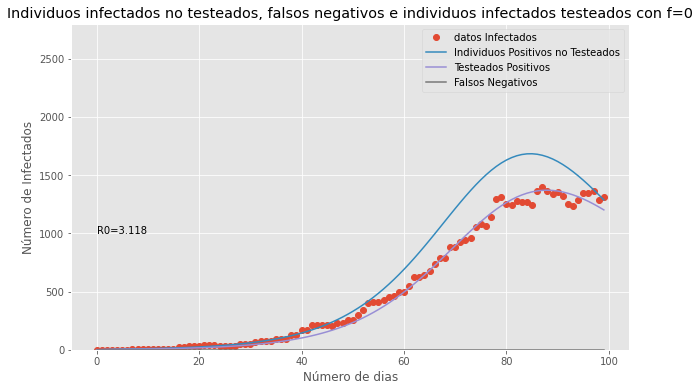

In [ ]:
plt.plot(tspan, data[:, 0],'o',label="datos Infectados" )
#plt.plot(tspan, Recuepradosmodelo1[:,0],'o',label="datos Recuperados" )
#plt.plot(tspan, data[:, 2],'o',label="datos Muertos" )
#plt.plot(tspan2, Estimacion[:, 0], label="Susceptibles" )
#plt.plot(tspan2, Estimacion[:, 2], label="Expuestos" )
plt.plot(tspan2, Estimacion[:, 2], label="Individuos Positivos no Testeados" )
plt.plot(tspan2, Estimacion[:, 3], label="Testeados Positivos" )
plt.plot(tspan2, Estimacion[:, 4], label="Falsos Negativos" )
#plt.plot(tspan2, Estimacion[:, 6], label="Recuperados testeados positivos" )
plt.title("Individuos infectados no testeados, falsos negativos e individuos infectados testeados con f={}".format(f))
plt.xlabel("Número de dias")
plt.ylabel("Número de Infectados")
plt.text(0, 1000, r'R0={}'.format(R01))
plt.legend()
plt.ylim(0,2800)
plt.savefig("gdrive/MyDrive/ImagenesTesis/Modelosinvacunaconf={}.jpg".format(f))
plt.show()

In [ ]:
print("Fitted MAE")
print('Infected: ', np.mean(np.abs(Estimacion[:, 3] - data[:, 0])))
#print('Recovered: ', np.mean(np.abs(fitted_predicted_IRD[:days, 1] - observed_IRD[:days, 1])))
#print('Dead: ', np.mean(np.abs(fitted_predicted_IRD[:days, 2] - observed_IRD[:days, 2])))

print("\nFitted RMSE")
print('Infected: ', np.sqrt(np.mean((Estimacion[:, 3] - data[:, 0])**2)))
#print('Recovered: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 1] - observed_IRD[:days, 1])**2)))
#print('Dead: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 2] - observed_IRD[:days, 2])**2)))

Fitted MAE
Infected:  33.014935205153286

Fitted RMSE
Infected:  45.32020170144974


# Sensibilidad

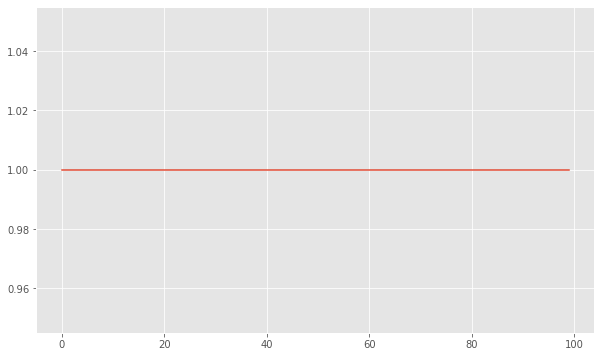

In [ ]:
Sensibilidad= Estimacion[:, 3]/(Estimacion[:, 3]+Estimacion[:, 4])
plt.plot(tspan2, Sensibilidad, label="Falsos Negativos" )

# Modelacion con vacunados

In [ ]:
def ode_model_con_vacuna(z, t, beta,p, r):
    """
    Reference https://www.idmod.org/docs/hiv/model-seir.html
    """
    S, V, E, U, P, F, RU,RR,DU,DR = z
    N=S+V+E+U+P+F+RU+RR+DU+DR
    dSdt =  -beta*S/initN*(alphap*P+alphau*U+F)+Lambda-mu*S-alpha_vac*S/initN
    dVdt = alpha_vac*S/initN-V*p*beta*(alphap*P+alphau*U+F)/initN-mu*V
    dEdt =  beta*S/initN*(alphap*P+alphau*U+F)+V*p*beta*(alphap*P+alphau*U+F)/initN-E/De - mu*E
    dUdt =  (1-r)*E/De-U/(beta1*Dr)-delta1*muc*U-mu*U
    dPdt =  r*(1-f)*E/De-P/Dr-muc*P-mu*P
    dFdt =  r*f*E/De-beta2*F/Dr-muc*F/delta2-mu*F
    dRUdt = U/(beta1*Dr)+beta2*F/Dr-mu*RU
    dRRdt = P/Dr-mu*RR
    dDUdt = delta1*muc*U+muc*F/delta2
    dDRdt = muc*P
    return [dSdt,dVdt,dEdt, dUdt, dPdt, dFdt, dRUdt, dRRdt, dDUdt, dDRdt]

In [ ]:
def ode_solver_vacuna(t, initial_conditions, params):
    initV, initE, initU, initP, initF, initRU, intRR, intDU, intDR, initN   = initial_conditions
    beta, p,r = params['beta'].value, params['p'].value, params['r'].value
    initS = initN - (initE+initU+initP+initF+initRU+intRR+intDU+intDR+initV)
    res = odeint(ode_model_con_vacuna, [initS, initV ,initE, initU, initP, initF, initRU, initRR, initDU, initDR], t, args=(beta, p,r))
    return res

In [ ]:
def error_vacuna(params, initial_conditions, tspan, data):
    sol = ode_solver_vacuna(tspan, initial_conditions, params)
    #return (sol[:, [3,6,8]] - data).ravel()
    return (sol[:, [4]] - data).ravel()

<AxesSubplot:xlabel='A'>

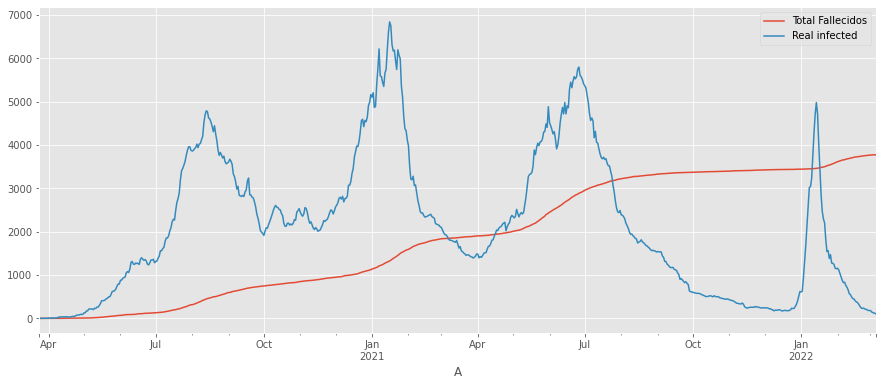

In [ ]:
rcParams['figure.figsize'] = 15, 6
Datosfinal.plot(x="A", y=["Total Fallecidos","Real infected"])

Seleccion datos

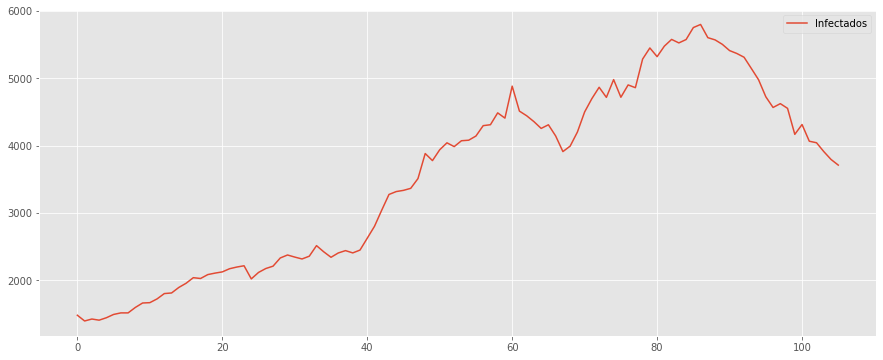

In [ ]:
#data = Datosfinal.loc["2020-03-24  ":"2020-08-14   ", ['Real infected', 'Total Recuperados', 'Total Fallecidos']].values
desde,hasta="2021-04-01","2021-07-15"
data = Datosfinal.loc[desde:hasta, ['Real infected']].values
days = data.shape[0]
tspan = np.arange(0, days, 1)
tspan
plt.plot(tspan, data[:, 0], label='Infectados')
#plt.plot(tspan, data[:, 1], label='Recuperados')
#plt.plot(tspan, data[:, 2], label='Muertos')
plt.legend()
plt.show()

Condicciones iniciales del problema

In [ ]:
# ref: https://www.medrxiv.org/content/10.1101/2020.04.01.20049825v1.full.pdf
f=0
initN = (Datosfinal["Total"].loc[hasta]-Datosfinal["Total"].loc[desde])*6.2
initV = 0.15*initN
print(initN)
# S0 = 966000000
initE =3000# Datosfinal['Real infected'].loc[desde]
initU = Datosfinal['Real infected'].loc[desde]
print(initU)
initP = Datosfinal['Real infected'].loc[desde]
initF = Datosfinal['Real infected'].loc[desde]*f
initRU =0
initRR =0#Datosfinal['Total Recuperados'].loc[desde]
initDU =0
initDR =Datosfinal['Total Fallecidos'].loc[desde]
initial_conditions = [initV, initE, initU, initP, initF, initRU, initRR, initDU, initDR, initN]

alpha_vac=0.15
p=0.1
alphap = 0.5
alphau = 0.7
Lambda = 3.95*10**(-5)
mu= 3.95*10**(-5)
Lambda =0
mu=0
muc= 0.03634*(1/20.18022)
De= 5.2
beta1= 0.6
beta2=0.7
Dr= 16.6269063/(1-0.03634)
delta1= 0.3
delta2= 0.7
R0=4
r=0.2


params = Parameters()
params.add('beta', min=0.01, max=10)
params.add('p', min=0.1, max=0.102)
params.add('r',min=0.001, max=0.999)

209485.6
1482.0


In [ ]:
# fit model and find predicted values
result_vacuna = minimize(error_vacuna, params, args=(initial_conditions, tspan, data), method= 'least_square' )
# result = minimize(error, params, args=(initial_conditions, tspan, data), method='leastsq', \
# **{'xtol':1.e-15, 'ftol':1.e-15})
result_vacuna.params

name,value,standard error,relative error,initial value,min,max,vary
beta,0.25035408,0.00795759,(3.18%),0.01,0.01000000,10.0000000,True
p,0.10127739,0.12945251,(127.82%),0.1,0.10000000,0.10200000,True
r,0.26945241,0.02153438,(7.99%),0.001,1.0000e-03,0.99900000,True


In [ ]:
Nombre_parametros=[]
Parametros_estimados=[]
for i in result_vacuna.params.items():
  Parametros_estimados.append(i[1].value)
  Nombre_parametros.append(i[0])
tspan2 = np.arange(0, 1*days, 1)

In [ ]:
initS = initN    - (initE + initU + initP + initF + initRU + initRR + initDU + initDR+initV)
Estimacion = odeint(ode_model_con_vacuna, [ initS,initV,initE, initU, initP, initF, initRU, initRR, initDU, initDR], tspan2, args=(Parametros_estimados[0], Parametros_estimados[1],Parametros_estimados[2]))


In [ ]:
indef=Datosfinal.loc[desde:hasta, ['Real infected']].index

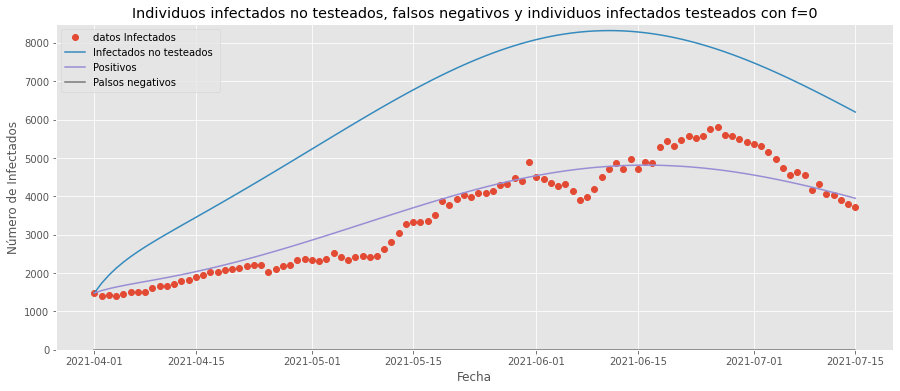

In [ ]:
plt.plot(indef, data[:, 0],'o',label="datos Infectados" )
#plt.plot(tspan, Recuepradosmodelo1[:,0],'o',label="datos Recuperados" )
#plt.plot(tspan, data[:, 2],'o',label="datos Muertos" )
#plt.plot(tspan2, Estimacion[:, 0], label="Susceptibles" )
#plt.plot(tspan2, Estimacion[:, 2], label="Expuestos" )
#plt.plot(tspan2, Estimacion[:, 1], label="Individuos Positivos no Testeados" )
plt.plot(indef, Estimacion[:, 3], label="Infectados no testeados " )
plt.plot(indef, Estimacion[:, 4], label="Positivos" )
plt.plot(indef, Estimacion[:, 5], label="Palsos negativos" )
#plt.plot(tspan2, Estimacion[:, 6], label="Recuperados testeados positivos" )
plt.title("Individuos infectados no testeados, falsos negativos y individuos infectados testeados con f={}".format(f))
plt.ylim(0,8500)
plt.xlabel("Fecha")
plt.ylabel("Número de Infectados")
plt.legend()
plt.savefig("gdrive/MyDrive/ImagenesTesis/Modeloconvacunaconf={}.jpg".format(f))
plt.show()

# Calculo de R_0

In [ ]:
beta=Parametros_estimados[0]
r=Parametros_estimados[1]
print(beta)
print(r)
Fac1=alphau*(1-r)/((1/(beta1*Dr))+delta1*muc+ mu)
Fac2=alphap*r*(1-f)/((1/Dr)+muc+mu)
Fac3=r*f/((beta2/Dr)+muc/delta2+mu)
R0=beta*(1+0.15)/(mu*De+1)*(Fac1+Fac2+Fac3)
R01=round(R0, 3)
R01

0.250354084992239
0.10127738852105428


2.109

# Modelación estocastica

A continuación se muestra un ejemplo de modelacion estocastica


In [ ]:
#data = Datosfinal.loc["2020-03-24  ":"2020-08-14   ", ['Real infected', 'Total Recuperados', 'Total Fallecidos']].values
#desde,hasta="2021-04-01","2021-09-05"
#dataf = Datosfinal.loc[desde:hasta, ['Real infected']]
#data = Datosfinal.loc[desde:hasta, ['Real infected']].values
#days = data.shape[0]
#tspan = np.arange(0, days, 1)
#tspan
#plt.bar(dataf.index,data[:, 0] )
#plt.plot(tspan, data[:, 0], label='Infectados')
#plt.plot(tspan, data[:, 1], label='Recuperados')
#plt.plot(tspan, data[:, 2], label='Muertos')
#plt.legend()
#plt.show()
#sp.stats.anderson(data[:, 0], dist='norm')

[[1.70194760e+05 3.14228400e+04 3.00000000e+03 ... 0.00000000e+00
  0.00000000e+00 1.90400000e+03]
 [1.69531802e+05 3.14105677e+04 3.09830709e+03 ... 8.58935568e+01
  8.00623779e-01 1.90666875e+03]
 [1.69422526e+05 3.14086408e+04 2.61368220e+03 ... 1.75663974e+02
  1.75116907e+00 1.90945795e+03]
 ...
 [6.23592465e+04 2.84109879e+04 3.00618752e+03 ... 2.66893847e+04
  4.28290064e+02 2.73324947e+03]
 [6.19841989e+04 2.83937291e+04 2.82038087e+03 ... 2.69113510e+04
  4.31233167e+02 2.74014605e+03]
 [6.16956051e+04 2.83803868e+04 2.57993610e+03 ... 2.71290813e+04
  4.34118548e+02 2.74691102e+03]]


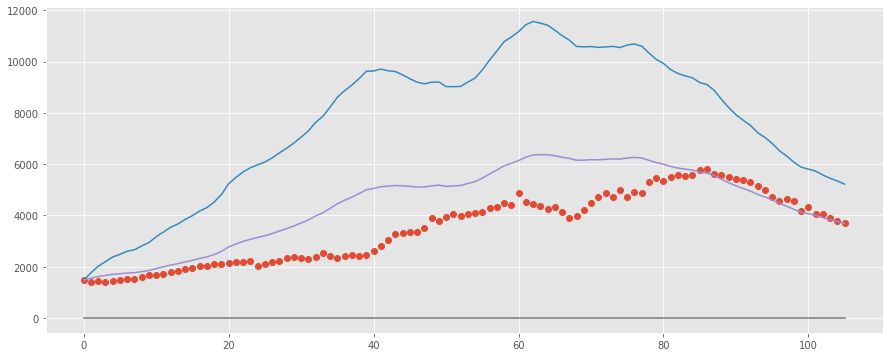

In [ ]:
# Zombie apocalypse SDE model

import matplotlib.pyplot as plt
import numpy as np
import sdeint

P, d, B, G, A = 0.0001, 0.0001, 0.0095, 0.0001, 0.0001

beta=		Parametros_estimados[0]
p=Parametros_estimados[1]
r=Parametros_estimados[2]
def ff(y, t):
  S, V, E, U, P, F, RU,RR,DU,DR = y
  N=S+V+E+U+P+F+RU+RR+DU+DR
  dSdt =  -beta*S/initN*(alphap*P+alphau*U+F)+Lambda-mu*S-alpha_vac*S/initN
  dVdt = alpha_vac*S/initN-V*p*beta*(alphap*P+alphau*U+F)/initN-mu*V
  dEdt =  beta*S/initN*(alphap*P+alphau*U+F)+V*p*beta*(alphap*P+alphau*U+F)/initN-E/De - mu*E
  dUdt =  (1-r)*E/De-U/(beta1*Dr)-delta1*muc*U-mu*U
  dPdt =  r*(1-f)*E/De-P/Dr-muc*P-mu*P
  dFdt =  r*f*E/De-beta2*F/Dr-muc*F/delta2-mu*F
  dRUdt = U/(beta1*Dr)+beta2*F/Dr-mu*RU
  dRRdt = P/Dr-mu*RR
  dDUdt = delta1*muc*U+muc*F/delta2
  dDRdt = muc*P
  return np.array([dSdt,dVdt,dEdt, dUdt, dPdt, dFdt, dRUdt, dRRdt, dDUdt, dDRdt])


def GG(y, t):
  S, V, E, U, P, F, RU,RR,DU,DR = y
  return np.array([[-0.15*S/initN*(alphap*P+alphau*U+F), 0, 0,0,0,0,0,0,0,0],
              [-0.15*p*V/initN*(alphap*P+alphau*U+F), 0, 0,0,0,0,0,0,0,0],
              [0.15*(p*V+S)/initN*(alphap*P+alphau*U+F),0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0]])

result = sdeint.itoEuler(ff, GG, np.array([ initS,initV,initE, initU, initP, initF, initRU, initRR, initDU, initDR]), tspan2)
print(result)
plt.plot(tspan, data[:, 0],'o',label="datos Infectados" )
plt.plot(tspan2,result[:,3], label="No Testeados Positivos" )
plt.plot(tspan2,result[:,4], label="Positivos" )
plt.plot(tspan2,result[:,5],label="Palsos negativos"  )
#plt.plot(tspan,result[:,3])
plt.show()

[[1.70194760e+05 3.14228400e+04 3.00000000e+03 ... 0.00000000e+00
  0.00000000e+00 1.90400000e+03]
 [1.69905488e+05 3.14175551e+04 2.71763331e+03 ... 8.58935568e+01
  8.00623779e-01 1.90666875e+03]
 [1.69849230e+05 3.14166255e+04 2.25219950e+03 ... 1.75663974e+02
  1.75116907e+00 1.90945795e+03]
 ...
 [8.81430711e+04 2.94157056e+04 3.40411937e+03 ... 1.99678518e+04
  3.18270565e+02 2.52440886e+03]
 [8.72478373e+04 2.93855128e+04 3.67490751e+03 ... 2.01669198e+04
  3.21171042e+02 2.53059397e+03]
 [8.68688065e+04 2.93726484e+04 3.36008981e+03 ... 2.03643151e+04
  3.24048139e+02 2.53672712e+03]]


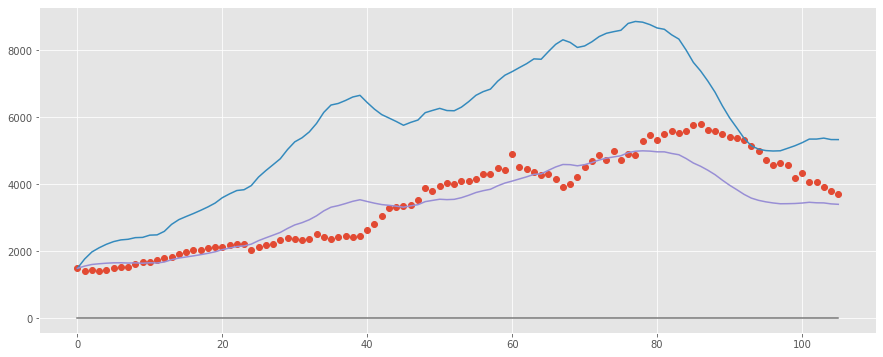

In [ ]:
# Zombie apocalypse SDE model

import matplotlib.pyplot as plt
import numpy as np
import sdeint

P, d, B, G, A = 0.0001, 0.0001, 0.0095, 0.0001, 0.0001

beta=		Parametros_estimados[0]
p=Parametros_estimados[1]
r=Parametros_estimados[2]
def ff(y, t):
  S, V, E, U, P, F, RU,RR,DU,DR = y
  N=S+V+E+U+P+F+RU+RR+DU+DR
  dSdt =  -beta*S/initN*(alphap*P+alphau*U+F)+Lambda-mu*S-alpha_vac*S/initN
  dVdt = alpha_vac*S/initN-V*p*beta*(alphap*P+alphau*U+F)/initN-mu*V
  dEdt =  beta*S/initN*(alphap*P+alphau*U+F)+V*p*beta*(alphap*P+alphau*U+F)/initN-E/De - mu*E
  dUdt =  (1-r)*E/De-U/(beta1*Dr)-delta1*muc*U-mu*U
  dPdt =  r*(1-f)*E/De-P/Dr-muc*P-mu*P
  dFdt =  r*f*E/De-beta2*F/Dr-muc*F/delta2-mu*F
  dRUdt = U/(beta1*Dr)+beta2*F/Dr-mu*RU
  dRRdt = P/Dr-mu*RR
  dDUdt = delta1*muc*U+muc*F/delta2
  dDRdt = muc*P
  return np.array([dSdt,dVdt,dEdt, dUdt, dPdt, dFdt, dRUdt, dRRdt, dDUdt, dDRdt])


def GG(y, t):
  S, V, E, U, P, F, RU,RR,DU,DR = y
  return np.array([[-0.15*S/initN*(alphap*P+alphau*U+F), 0, 0,0,0,0,0,0,0,0],
              [-0.15*p*V/initN*(alphap*P+alphau*U+F), 0, 0,0,0,0,0,0,0,0],
              [0.15*(p*V+S)/initN*(alphap*P+alphau*U+F),0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0]])

result = sdeint.itoEuler(ff, GG, np.array([ initS,initV,initE, initU, initP, initF, initRU, initRR, initDU, initDR]), tspan2)
print(result)
plt.plot(tspan, data[:, 0],'o',label="datos Infectados" )
plt.plot(tspan2,result[:,3], label="No Testeados Positivos" )
plt.plot(tspan2,result[:,4], label="Positivos" )
plt.plot(tspan2,result[:,5],label="Palsos negativos"  )
#plt.plot(tspan,result[:,3])
plt.show()

In [ ]:
len(Datosfinal.loc[desde:hasta, ['Real infected']].index)
len(result[:,4])

106

In [ ]:
print(tspan2)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]


In [ ]:
print(indef)

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10',
               ...
               '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
               '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
               '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', name='A', length=106, freq=None)


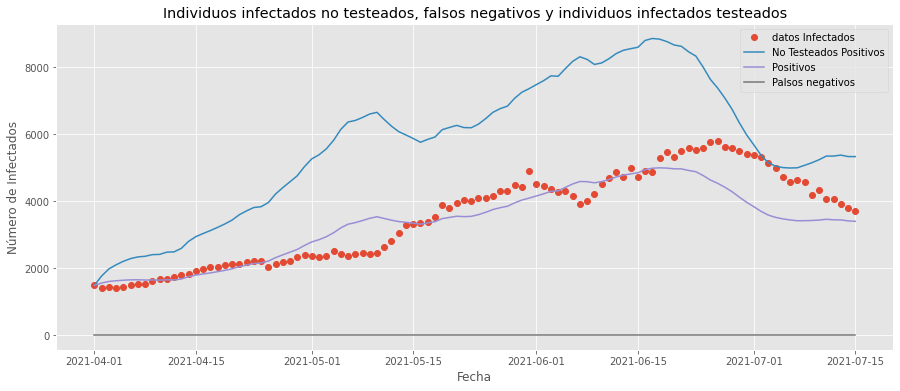

In [ ]:
indef=Datosfinal.loc[desde:hasta, ['Real infected']].index
plt.plot(indef, data[:, 0],'o',label="datos Infectados" )
plt.plot(indef[tspan2],result[:,3], label="No Testeados Positivos" )
plt.plot(indef[tspan2],result[:,4], label="Positivos" )
plt.plot(indef[tspan2],result[:,5],label="Palsos negativos"  )
plt.title("Individuos infectados no testeados, falsos negativos y individuos infectados testeados")
plt.xlabel("Fecha")
plt.ylabel("Número de Infectados")
plt.legend()
plt.savefig("gdrive/MyDrive/ImagenesTesis/Modeloestocasticovacuna.jpg")
plt.show()

In [ ]:
print("Fitted MAE")
print('Infected: ', np.mean(np.abs(result[:,4] - data[:, 0])))
#print('Recovered: ', np.mean(np.abs(fitted_predicted_IRD[:days, 1] - observed_IRD[:days, 1])))
#print('Dead: ', np.mean(np.abs(fitted_predicted_IRD[:days, 2] - observed_IRD[:days, 2])))

print("\nFitted RMSE")
print('Infected: ', np.sqrt(np.mean((result[:,4] - data[:, 0])**2)))
#print('Recovered: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 1] - observed_IRD[:days, 1])**2)))
#print('Dead: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 2] - observed_IRD[:days, 2])**2)))

Fitted MAE
Infected:  472.86540841576266

Fitted RMSE
Infected:  638.2826611425907


In [ ]:
Graficas_estocasticas=[]
for i in range(10000):
  result2 = sdeint.itoEuler(ff, GG, np.array([ initS,initV,initE, initU, initP, initF, initRU, initRR, initDU, initDR]), tspan2)
  error=np.mean(np.abs(result2[:,4] - data[:, 0]))
  if error < 230:
    Graficas_estocasticas.append(result2)

print(len(Graficas_estocasticas))


17


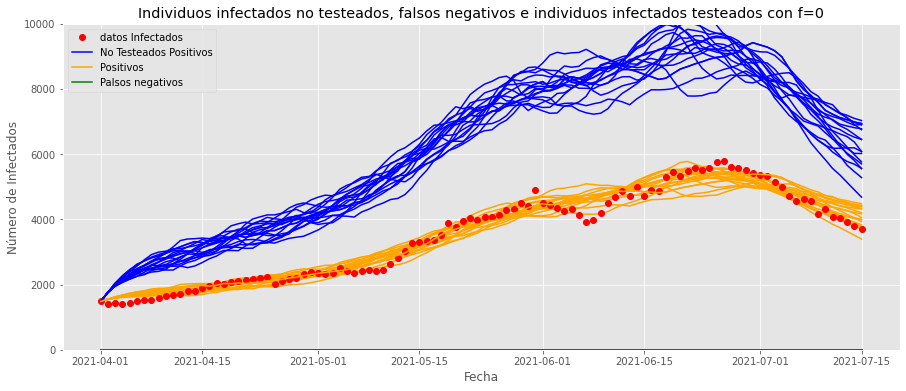

In [ ]:
indef=Datosfinal.loc[desde:hasta, ['Real infected']].index
for i in Graficas_estocasticas:
  plt.plot(indef,i[:,3],color="blue" )
  plt.plot(indef,i[:,4],color="orange" )
  plt.plot(indef,i[:,5],color="green"  )
plt.plot(indef, data[:, 0],'o',label="datos Infectados",color="red")
plt.plot(indef,i[:,3], label="No Testeados Positivos",color="blue" )
plt.plot(indef,i[:,4], label="Positivos",color="orange" )
plt.plot(indef,i[:,5],label="Palsos negativos",color="green"  )
plt.title("Individuos infectados no testeados, falsos negativos e individuos infectados testeados con f={}".format(f))
plt.ylim(0,10000)
plt.xlabel("Fecha")
plt.ylabel("Número de Infectados")
plt.legend()
plt.savefig("gdrive/MyDrive/ImagenesTesis/Modeloestocasticovacunaconf={}.jpg".format(f))
plt.show()